In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [7]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM2.5
0,14.9,21.6,8.8,1017.4,76,0.8,0.9,7.6,313.22
1,14.7,21.6,10.2,1018.1,97,0.6,3.1,9.4,87.18
2,15.0,16.8,13.6,1017.5,94,0.5,0.9,7.6,146.60
3,9.8,17.6,6.4,1016.6,90,0.5,3.9,11.1,217.87
4,10.1,14.5,7.2,1019.2,90,0.3,3.3,7.6,201.66


In [8]:
df.isnull()

,T,TM,Tm,SLP,H,VV,V,VM,PM2.5
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1000,False,False,False,False,False,False,False,False,False
1001,False,False,False,False,False,False,False,False,False
1002,False,False,False,False,False,False,False,False,False
1003,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

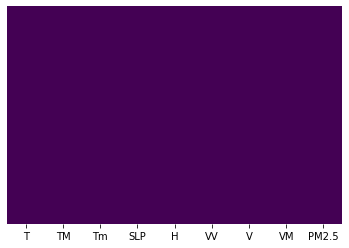

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [10]:
df=df.dropna()

In [11]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [12]:
X.isnull()


,T,TM,Tm,SLP,H,VV,V,VM
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1000,False,False,False,False,False,False,False,False
1001,False,False,False,False,False,False,False,False
1002,False,False,False,False,False,False,False,False
1003,False,False,False,False,False,False,False,False


In [13]:
y.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1000    False
1001    False
1002    False
1003    False
1004    False
Name: PM2.5, Length: 1004, dtype: bool

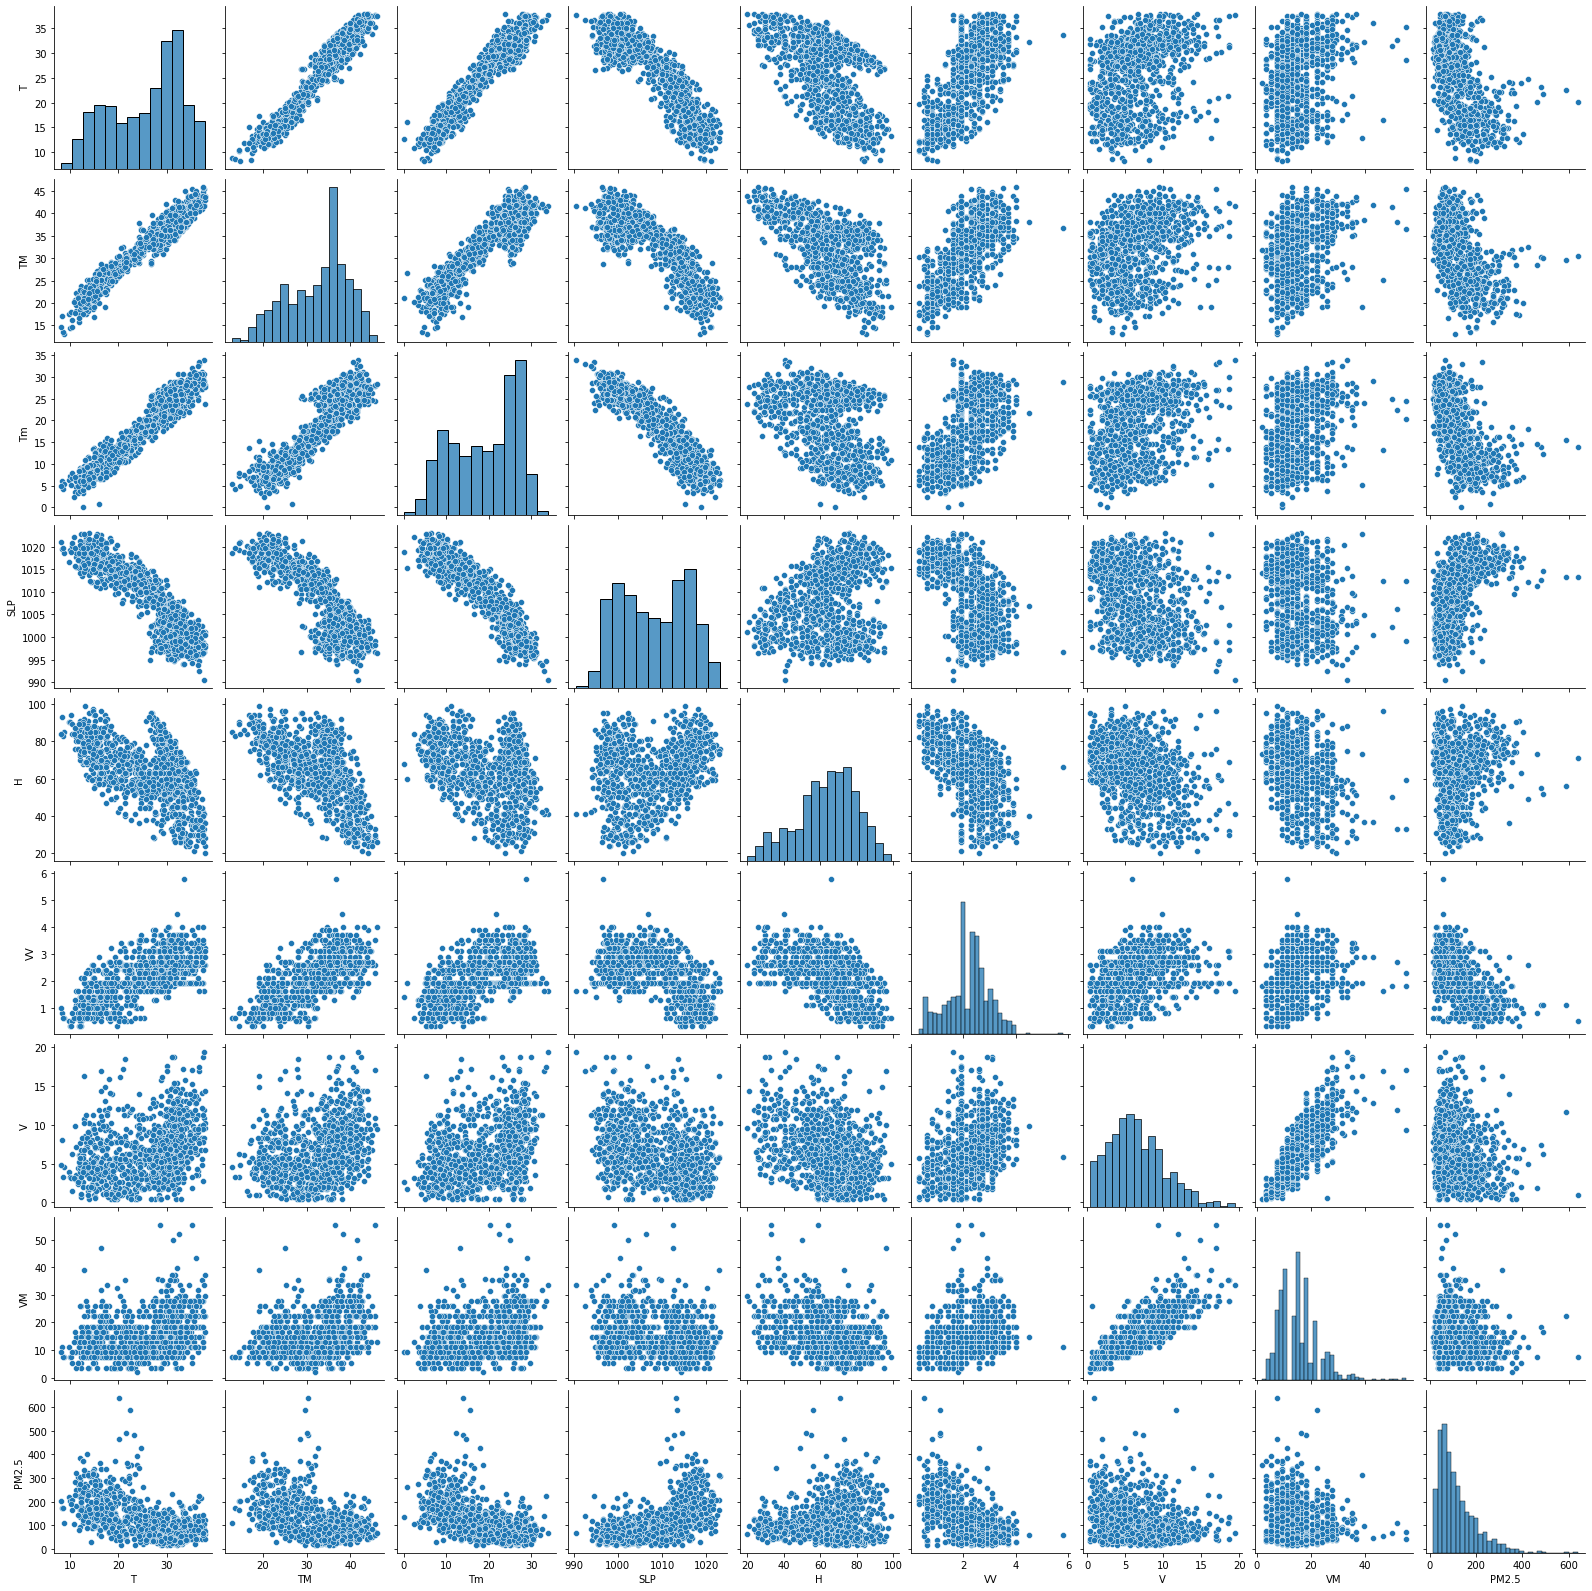

In [14]:
sns.pairplot(df)

In [15]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM2.5
T,1.000000,0.964594,0.955711,-0.891884,-0.535912,0.668832,0.316854,0.275967,-0.594493
TM,0.964594,1.000000,0.893482,-0.838709,-0.607244,0.644825,0.295361,0.286473,-0.536371
Tm,0.955711,0.893482,1.000000,-0.918811,-0.323972,0.578447,0.312821,0.245576,-0.629422
SLP,-0.891884,-0.838709,-0.918811,1.000000,0.287924,-0.544693,-0.315643,-0.258492,0.602089
H,-0.535912,-0.607244,-0.323972,0.287924,1.000000,-0.535830,-0.328735,-0.354890,0.121788
VV,0.668832,0.644825,0.578447,-0.544693,-0.535830,1.000000,0.361781,0.295303,-0.517839
V,0.316854,0.295361,0.312821,-0.315643,-0.328735,0.361781,1.000000,0.813384,-0.198076
VM,0.275967,0.286473,0.245576,-0.258492,-0.354890,0.295303,0.813384,1.000000,-0.154753
PM2.5,-0.594493,-0.536371,-0.629422,0.602089,0.121788,-0.517839,-0.198076,-0.154753,1.000000


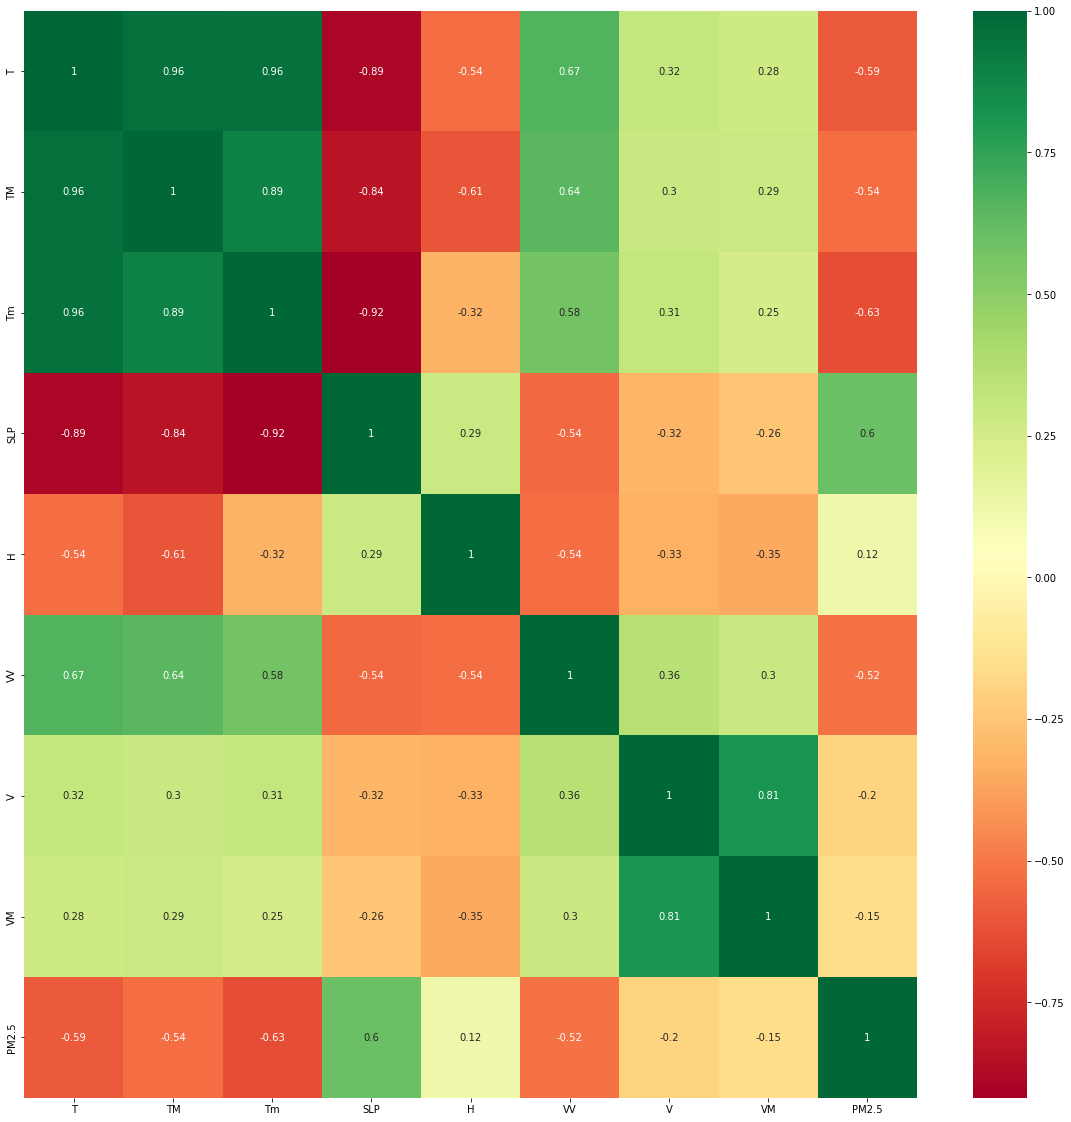

In [16]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [17]:
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM2.5'], dtype='object')

In [18]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [19]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,14.9,21.6,8.8,1017.4,76,0.8,0.9,7.6
1,14.7,21.6,10.2,1018.1,97,0.6,3.1,9.4
2,15.0,16.8,13.6,1017.5,94,0.5,0.9,7.6
3,9.8,17.6,6.4,1016.6,90,0.5,3.9,11.1
4,10.1,14.5,7.2,1019.2,90,0.3,3.3,7.6


In [20]:
print(model.feature_importances_)

[0.17145017 0.1107622  0.19830993 0.15947337 0.10249845 0.14779808
 0.05831407 0.05139374]


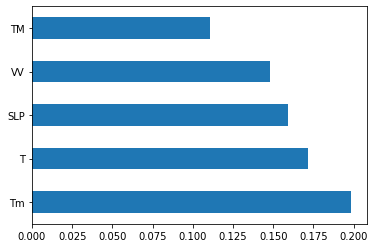

In [21]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

c:\users\91701\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM2.5', ylabel='Density'>

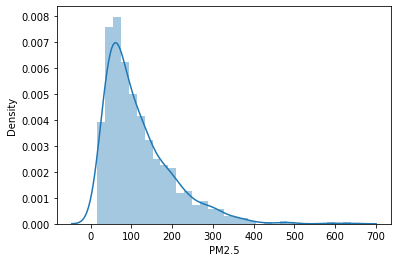

In [22]:
sns.distplot(y)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
from sklearn.linear_model import LinearRegression


In [25]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [26]:
regressor.coef_

array([  0.1814797 ,   0.08577686,  -3.97940922,   1.72890345,
        -1.33286338, -41.75633456,   1.66396107,  -0.69919608])

In [27]:
regressor.intercept_

-1380.6706614790378

In [28]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.48469021558154113


In [29]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.4304854268567747


In [30]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [31]:
score.mean()

0.4103570529480602

In [32]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
T,0.181480
TM,0.085777
Tm,-3.979409
SLP,1.728903
H,-1.332863
VV,-41.756335
V,1.663961
VM,-0.699196


In [33]:
prediction=regressor.predict(X_test)

c:\users\91701\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM2.5', ylabel='Density'>

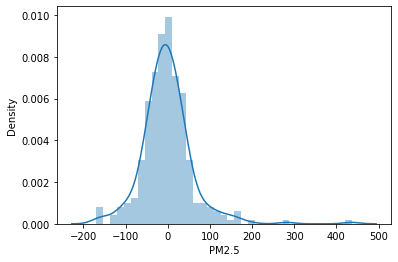

In [34]:
sns.distplot(y_test-prediction)


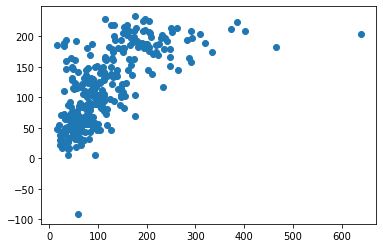

In [35]:
plt.scatter(y_test,prediction)


In [36]:
from sklearn import metrics


In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegressionprint('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

SyntaxError: invalid syntax (Temp/ipykernel_17672/2657903174.py, line 2)

In [ ]:
###Linear regreesion

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


In [39]:
lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-3861.3904070101503


In [40]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [41]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [42]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 20}
-3859.442600646295


In [43]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


In [44]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

c:\users\91701\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1502464.8801994452, tolerance: 561.9160393234124
  model = cd_fast.enet_coordinate_descent(
c:\users\91701\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1269052.8347271301, tolerance: 495.70676999666256
  model = cd_fast.enet_coordinate_descent(
c:\users\91701\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1433189.1744170908, tolerance: 546.5687102165131
  model = cd_fast.enet_coordinate_descent(
c:\users\91701\app

{'alpha': 1}
-3852.6500155171634


In [45]:
prediction=lasso_regressor.predict(X_test)

c:\users\91701\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM2.5', ylabel='Density'>

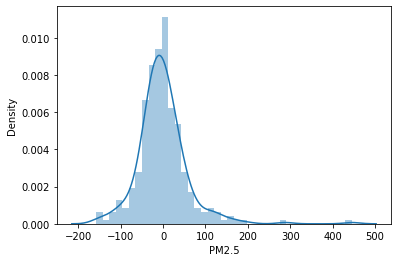

In [46]:
sns.distplot(y_test-prediction)

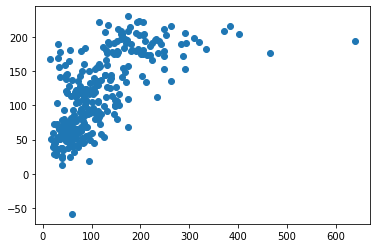

In [47]:
plt.scatter(y_test,prediction)

In [48]:
from sklearn import metrics

In [49]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 39.64521894959169
MSE: 3575.71163812357
RMSE: 59.7972544363332


In [50]:
import pickle 

In [51]:
# open a file, where you ant to store the data
file = open('lasso_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(lasso_regressor, file)